In [2]:
import matplotlib.pyplot as plt
import numpy as np

class Trapezoid:

    def __init__(self,f):
        self.f = f
        pass

    def fit(self,a,b,n):
        self.n = n
        if a!=b:
            if a<b:
                self.a = a
                self.b = b
            elif b<a:
                print(f"It should be {a}<{b}... considering the interval as [{b},{a}].")
                self.a,self.b = b,a
            h = (self.b-self.a)/self.n
            sum = 0
            for j in range(1,self.n):
                sum += self.f(self.a+j*h)
            self.aprox = (self.b-self.a)*(self.f(self.a)+2*sum+self.f(self.b))/(2*self.n)    
        else:
            self.aprox = 0
        return self.aprox

    def plot(self):
        x_axis = np.linspace(self.a,self.b,100)
        division = np.linspace(self.a,self.b,self.n+1)
        plt.figure(dpi=100)
        plt.plot(x_axis,[self.f(x) for x in x_axis])
        plt.plot(x_axis,[0 for x in x_axis],color='gray')
        plt.plot(division,[self.f(x) for x in division])
        for x in division:
            plt.plot([x,x],[0,f(x)],color='gray')
        plt.show()

    def get_errors(self,dx2_prom,real_value=None,silent=False):
        self.aprox_error = -dx2_prom*(self.b-self.a)**3/(12*self.n**2)
        if not silent:
            print(f"Error aproximado: {self.aprox_error}")
        if real_value is not None:
            self.real_error = (real_value - self.aprox)/real_value
            if not silent:
                print(f"Error relativo: {self.real_error}")
        

Error aproximado: 0.6400000000000001
Error relativo: 0.34850441899065027


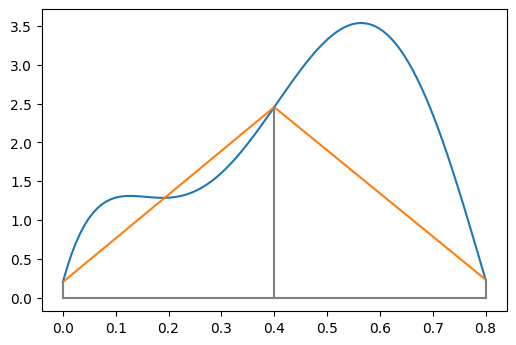

Valor real 1.640533
Valor aproximado 1.0688000000000115


In [3]:
a, b = 0, 0.8
real_value = 1.640533
n = 2

def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trap = Trapezoid(f)

aproximacion = trap.fit(a,b,n=n)
trap.get_errors(dx2_prom=-60,real_value=real_value,silent=False)
trap.plot()

print(f"Valor real {real_value}")
print(f"Valor aproximado {aproximacion}")

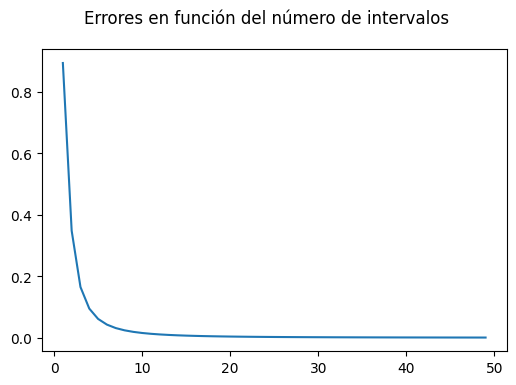

In [70]:
a, b = 0, 0.8
real_value = 1.640533
ns = list(range(1,50))

def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trap = Trapezoid(f)

errores = []

for k in ns:
    trap = Trapezoid(f)
    trap.fit(a,b,n=k)
    trap.get_errors(dx2_prom=-60,real_value=real_value,silent=True)
    errores.append(trap.real_error)

plt.figure(dpi=100)
plt.suptitle("Errores en función del número de intervalos")
plt.plot(ns,errores)
plt.show()

# Con la clase

## Un ejemplo malo

Valor aproximado: 1.640277344256001, Valor real: 1.640533


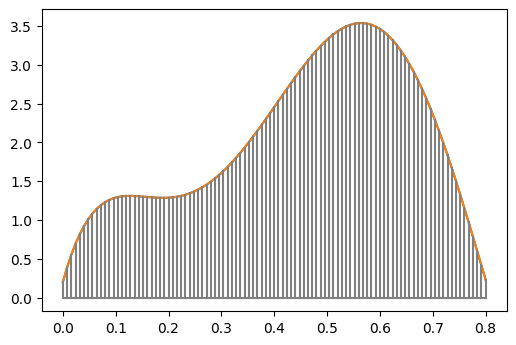

In [11]:
from integracion import Trapezoid

a, b = 0, 0.8
real_value = 1.640533


def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trp = Trapezoid(f)
aprox = trp.fit(a,b,n=100)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
trp.plot()

In [8]:
trp.get_errors(dx2_prom=-60)

Error aproximado: 2.5600000000000005


Valor aproximado: 1.6549399176954684, Valor real: 1.640533


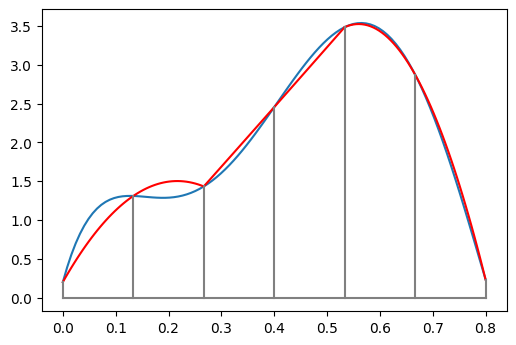

In [31]:
from integracion import Simpson

a, b = 0, 0.8
real_value = 1.640533
n = 6

def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

trp = Simpson(f)
aprox = trp.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
trp.plot()

## Un ejemplo bueno

Valor aproximado: 2.2870370370370368, Valor real: 2.29167


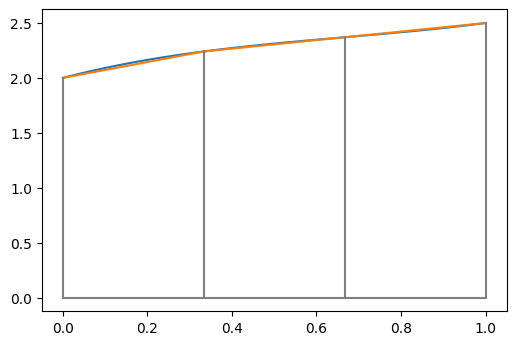

In [2]:
from integracion import Trapezoid

a, b = 0, 1
real_value = 2.29167
n = 3

def f(x):
    return 2+x-x**2+0.5*x**3

trp = Trapezoid(f)
aprox = trp.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
trp.plot()

In [19]:
trp.get_errors(dx2_prom=-0.8)

Error aproximado: 0.003792592592592594


## Otro ejemplo polinomial

Valor aproximado: 6.737500000000001, Valor real: 6.735


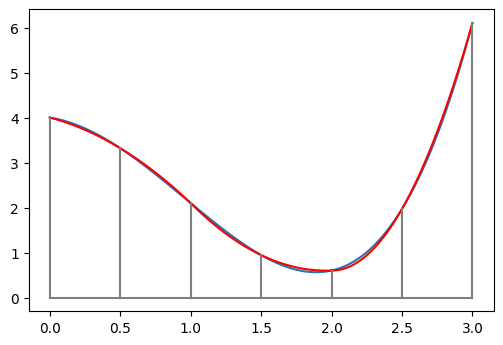

In [5]:
from integracion import Simpson

a, b = 0, 3
real_value = 6.735
n = 6

def f(x):
    return 4-0.5*x-2*x**2+0.5*x**3+0.1*x**4

simp_int = Simpson(f)
aprox = simp_int.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
simp_int.plot()

In [3]:
def df3(x):
    return 3+2.4*x

prom_4ds = (df3(b)-df3(a))/(b-a)
print(prom_4ds)

simp_int.get_errors(dx4_prom=prom_4ds,real_value=real_value)

2.4
Error aproximado: -0.0024999999999999996
Error relativo: -0.0003711952487008746


In [4]:
print(f"Nodos: {simp_int.nodes}")

Nodos: [0.  0.5 1.  1.5 2.  2.5 3. ]


# Un tercer ejemplo

Valor aproximado: 0.7683740948338069, Valor real: 0.634036


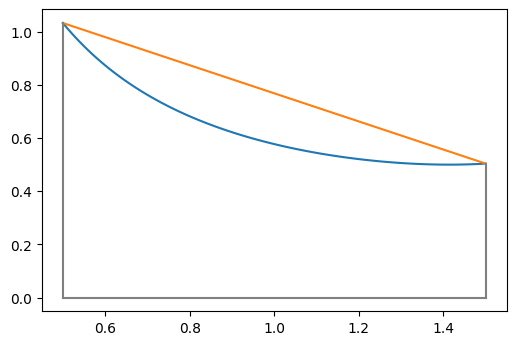

In [20]:
from math import sqrt
from integracion import Trapezoid

def f(x):
    return 1/(x*sqrt(4-x**2))

a, b = 0.5, 1.5
real_value = 0.634036
n = 1

trp = Trapezoid(f)
aprox = trp.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
trp.plot()

In [21]:
def df(x):
    return (2*(x**2 - 2))/(x**2*(4 - x**2)**(3/2))

prom_ddf = df(1.5)-df(0.5)

print(prom_ddf)

trp.get_errors(dx2_prom=prom_ddf)

2.0238760207176543
Error aproximado: -0.1686563350598045


Valor aproximado: 0.6443202440401258, Valor real: 0.634036


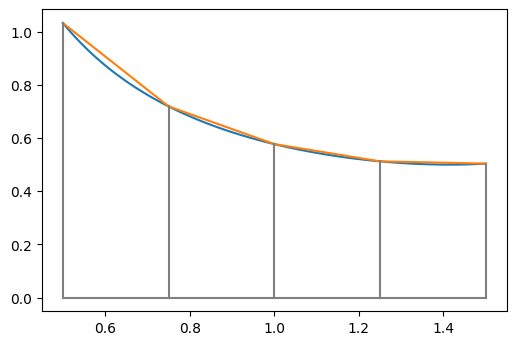

Nodos: [0.5  0.75 1.   1.25 1.5 ]


In [22]:
a, b = 0.5, 1.5
real_value = 0.634036
n = 4

trp = Trapezoid(f)
aprox = trp.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
trp.plot()
print(f"Nodos: {trp.nodes}")

In [23]:
trp.get_errors(dx2_prom=prom_ddf)

Error aproximado: -0.010541020941237782


## Ejemplo 4

Valor aproximado: 1.767435412165737, Valor real: nan


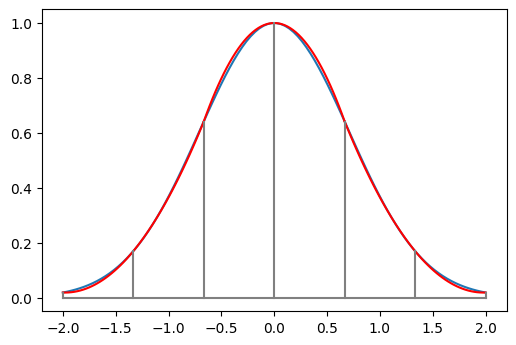

In [10]:
from integracion import Simpson
from math import e 
import numpy as np

a, b = -2, 2
real_value = np.nan
n = 6

def f(x):
    return e**(-x**2)

simp_int = Simpson(f)
aprox = simp_int.fit(a,b,n=n)
print(f"Valor aproximado: {aprox}, Valor real: {real_value}")
simp_int.plot()

# Usando scipy

In [24]:
from scipy.integrate import quad

result = quad(lambda x: 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5, 0, 1)

print(f"Aproximación de la integral: {result[0]}")
print(f"Aproximación del error: {result[1]}")

Aproximación de la integral: 1.4499999999999977
Aproximación del error: 2.043839875022438e-14


In [1]:
z = 1-2j
w = 2+1j

z*w

(4-3j)